Regression and its evaluation assignment


Q1: What is Simple Linear Regression?

-> Simple linear regression is a statistical method used to model and analyze the relationship between two continuous variables: one independent variable (predictor) and one dependent variable (outcome). It estimates how the dependent variable changes as the independent variable changes by fitting a straight "best-fit" line to the data.


Q2: What are the key assumptions of Simple Linear Regression?

->1 LINEARITY
  2 INDEPENDENCE
  3 EQUAL VARIANCE
  4 NORMAALITY


Q3:  What is heteroscedasticity, and why is it important to address in regression
models?

-> Heteroscedasticity refers to a situation in regression analysis where the variance of the residuals (errors) is not constant across all levels of the independent variables.

Invalid Hypothesis Tests
Reduced Precision
Unreliable Confidence Intervals
Misleading Predictions



Q4:  What is Multiple Linear Regression?

-> Multiple linear regression (MLR) is a statistical technique that models the relationship between one continuous dependent variable and two or more independent variables. It is an extension of simple linear regression, allowing for more complex analysis where multiple factors simultaneously influence a single outcome.


Q5: What is polynomial regression, and how does it differ from linear
regression?

-> Polynomial regression is a type of regression analysis that models the relationship between an independent variable (\(x\)) and a dependent variable (\(y\)) as an $n$th-degree polynomial. While linear regression fits a straight line, polynomial regression fits a curved line to data, allowing it to capture non-linear relationships








Q6: Implement a Python program to fit a Simple Linear Regression model to
the following sample data:
● X = [1, 2, 3, 4, 5]
● Y = [2.1, 4.3, 6.1, 7.9, 10.2]
Plot the regression line over the data points.


Slope: 1.98
Intercept: 0.18


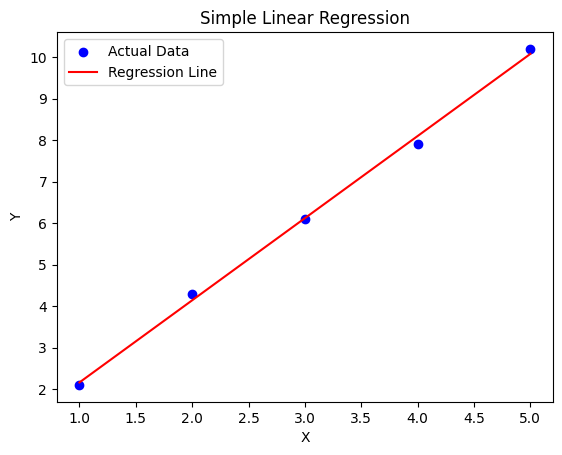

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample Data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])
# Create and fit the model
model = LinearRegression()
model.fit(X, Y)

# Extract coefficients
slope = model.coef_[0]
intercept = model.intercept_

print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
# Generate predictions for the line
Y_pred = model.predict(X)

# Plotting
plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()


Q7: Question 7: Fit a Multiple Linear Regression model on this sample data:
● Area = [1200, 1500, 1800, 2000]
● Rooms = [2, 3, 3, 4]
● Price = [250000, 300000, 320000, 370000]
Check for multicollinearity using VIF and report the results.


In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# 1. Prepare the Data
data = {
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
}
df = pd.DataFrame(data)

# Define Independent (X) and Dependent (y) variables
X = df[['Area', 'Rooms']]
y = df['Price']

# 2. Fit the Multiple Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Output coefficients
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficients: Area={model.coef_[0]:.2f}, Rooms={model.coef_[1]:.2f}")

# 3. Check for Multicollinearity using VIF
# VIF requires a constant (intercept) column to be added to the features
X_vif = add_constant(X)

vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]

print("\nVIF Results:")
print(vif_data[vif_data["Feature"] != 'const']) # Hide the constant row for clarity


Intercept: 103157.89
Coefficients: Area=63.16, Rooms=34736.84

VIF Results:
  Feature       VIF
1    Area  7.736842
2   Rooms  7.736842


Q8:  Implement polynomial regression on the following data:
● X = [1, 2, 3, 4, 5]
3
● Y = [2.2, 4.8, 7.5, 11.2, 14.7]
Fit a 2nd-degree polynomial and plot the resulting curve.


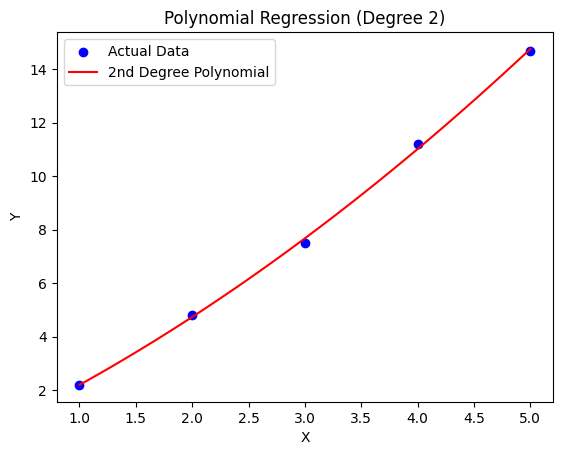

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Input data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])
# Transform X to include x^2 terms
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the regression model
model = LinearRegression()
model.fit(X_poly, Y)

# Get coefficients for the equation
intercept = model.intercept_
coeffs = model.coef_
# Generate points for a smooth curve
X_range = np.linspace(1, 5, 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
Y_range_pred = model.predict(X_range_poly)

# Plotting
plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X_range, Y_range_pred, color='red', label='2nd Degree Polynomial')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression (Degree 2)')
plt.legend()
plt.show()


Q9: Create a residuals plot for a regression model trained on this data:
● X = [10, 20, 30, 40, 50]
● Y = [15, 35, 40, 50, 65]
Assess heteroscedasticity by examining the spread of residuals


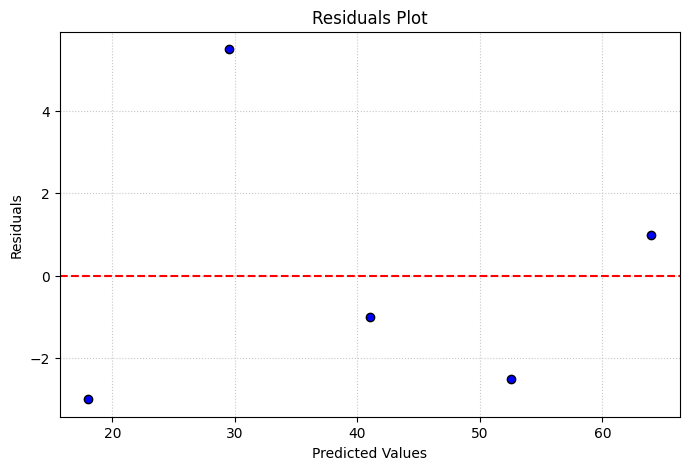

Predicted Values: [18.  29.5 41.  52.5 64. ]
Residuals: [-3.   5.5 -1.  -2.5  1. ]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. Prepare Data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# 2. Fit the Linear Regression Model
model = LinearRegression()
model.fit(X, Y)

# 3. Calculate Predicted Values and Residuals
Y_pred = model.predict(X)
residuals = Y - Y_pred

# 4. Generate Residuals Plot
plt.figure(figsize=(8, 5))
plt.scatter(Y_pred, residuals, color='blue', edgecolors='black')
plt.axhline(y=0, color='red', linestyle='--') # Zero line for reference
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True, linestyle=':', alpha=0.7)
plt.show()

# 5. Output Data for Assessment
print(f"Predicted Values: {Y_pred}")
print(f"Residuals: {residuals}")


Q10: Imagine you are a data scientist working for a real estate company. You
need to predict house prices using features like area, number of rooms, and location.
However, you detect heteroscedasticity and multicollinearity in your regression
model. Explain the steps you would take to address these issues and ensure a robust
model.


ANS-> Addressing Multicollinearity
 Addressing Heteroscedasticity
  Model Refinement & Validation